### ZUNAJRAVNINSKI GRAFI (OUTERPLANAR GRAPHS)

## Navodila za uporabo programa

# Predpogoj za uporabo
Potrebno je imeti nameščen SageMath.

# Navodila za uporabo
Poganjajte vrstice po vrsti.

# Struktura programa
1. Definicija funkcije alpha_od(G)
2. Sistematično generiranje ravninskih grafov s programom Plantri
3. Preverjanje ali je graf zunajravninski s funkcijo is.circular_planar() in računanje in preverjanje najinega problema
4. Definicija funkcije, ki sama naključno ustvari zunajravninski graf na n vozliščih
5. Pognana funkcija za n med 1 in 200 in izpis rezultatov

In [ ]:
def is_outerplanar(G):
    """Funckija preveri, ali je graf G outerplanaren."""
    if not G.is_planar():
        return False
    
    K4 = graphs.CompleteGraph(4)
    K23 = graphs.CompleteBipartiteGraph(2, 3)

    for H in G.minor(induced=True):
        if H.is_isomorphic(K4) or H.is_isomorphic(K23):
            return False
        
    return True

# 1. Definicija funkcije alpha_od(G)
Za preverjanje najinega problema sva si sposodila funkcijo, ki z linearnim programom izračuna liho neodvisno množico danega grafa.
Funkcija je bila napisana v prejšnji skupini projektov.

In [5]:
def alpha_od(G):
    """
    Compute the size of the maximum odd independent set in the graph G.
    """
    from sage.numerical.mip import MixedIntegerLinearProgram
    
    n = G.order()
    V = G.vertices()
    
    # Create the mixed integer linear program
    mip = MixedIntegerLinearProgram(maximization=True)
    
    # Define variables
    x = mip.new_variable(binary=True) # Indicator if vertex v is in the independent set
    y = mip.new_variable(binary=True) # Indicator if vertex v has neighbors in the independent set
    z = mip.new_variable(integer=True) # Counter for the vertex v
    
    # Objective function
    mip.set_objective(mip.sum(x[v] for v in V))
    
    # Constraints
    for u, v in G.edges(labels=False):
        mip.add_constraint(x[u] + x[v] <= 1)
        
    for u in V:
        sum_neighbors = mip.sum(x[v] for v in G.neighbors(u))
        mip.add_constraint(sum_neighbors <= n * y[u])
        mip.add_constraint(y[u] + sum_neighbors == 2*z[u])
    
    # Solve the MIP
    return int(mip.solve())

Preverimo delovanje funkcije na manjših grafih.

In [31]:
from sage.all import Graph
from sage.graphs.graph_generators import graphs

P4 = graphs.PathGraph(4)
C4 = graphs.CycleGraph(4)
C5 = graphs.CycleGraph(5)

for name, G in [("P4", P4), ("C4", C4), ("C5", C5)]:
    print(name, "alpha_od =", alpha_od(G))

P4 alpha_od = 2
C4 alpha_od = 1
C5 alpha_od = 1


In [ ]:
G = Graph([(0,1),(1,2),(2,0)])
dir(G)            # seznam atributov/metod

['__add__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__pari__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_cycles_iterator_vertex',
 '_all_paths_iterator',
 '_all_simple_cycles_iterator_edge',
 '_ascii_art_',
 '_axiom_',
 '_axiom_init_',
 '_backend',
 '_bit_vector',
 '_build_flow_graph',
 '_cache_key',
 '_check_embedding_validity',
 '_check_pos_validity',
 '_check_weight_function',
 '_circle_embedding',
 '_color_by_label',
 '_copy_attribute_from',
 '_directed',
 '_ford_fulkerson',
 '_fricas_',
 '_fricas_init_',
 '_gap_',
 '_gap_init_',
 '_get_weight_function',
 '_giac_

In [ ]:
g = graphs.PetersenGraph()
K5_minor = g.minor(graphs.CompleteGraph(5))
K5_minor
g.is_planar()

False

In [ ]:
from itertools import combinations

def is_outerplanar(G):
    """Funckija preveri, ali je graf G outerplanaren."""
    if not G.is_planar():
        return False

    K4 = graphs.CompleteGraph(4)
    K23 = graphs.CompleteBipartiteGraph(2, 3)

    V = G.vertices()

    for S in combinations(V, 4):
        if G.subgraph(S).is_isomorphic(K4):
            return False

    for S in combinations(V, 5):
        if G.subgraph(S).is_isomorphic(K23):
            return False

    return True

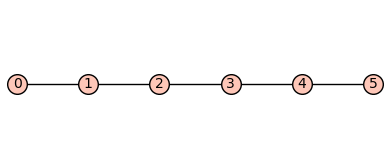

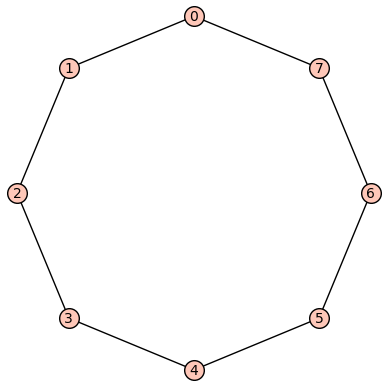

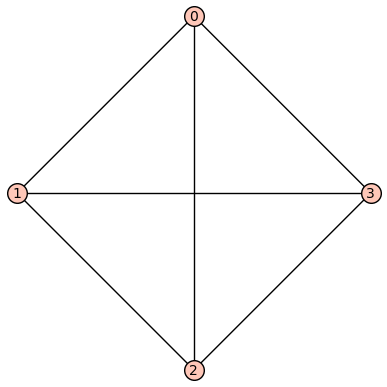

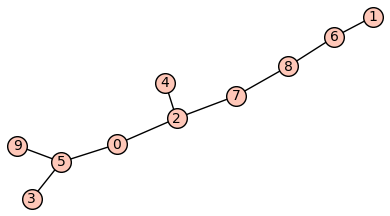

G1 True
G2 True
G3 False
G4 True


In [ ]:
G1 = graphs.PathGraph(6)
G2 = graphs.CycleGraph(8)
G3 = graphs.CompleteGraph(4)
G4 = graphs.RandomTree(10)
G1.show()
G2.show()
G3.show()
G4.show()
print("G1", is_outerplanar(G1))
print("G2", is_outerplanar(G2))
print("G3", is_outerplanar(G3))
print("G4", is_outerplanar(G4))

In [38]:
def alpha_od(G):
    """
    Compute the size of the maximum odd independent set in the graph G.
    """
    from sage.numerical.mip import MixedIntegerLinearProgram
    
    n = G.order()
    V = G.vertices()
    
    # Create the mixed integer linear program
    mip = MixedIntegerLinearProgram(maximization=True)
    
    # Define variables
    x = mip.new_variable(binary=True) # Indicator if vertex v is in the independent set
    y = mip.new_variable(binary=True) # Indicator if vertex v has neighbors in the independent set
    z = mip.new_variable(integer=True) # Counter for the vertex v
    
    # Objective function
    mip.set_objective(mip.sum(x[v] for v in V))
    
    # Constraints
    for u, v in G.edges(labels=False):
        mip.add_constraint(x[u] + x[v] <= 1)
        
    for u in V:
        sum_neighbors = mip.sum(x[v] for v in G.neighbors(u))
        mip.add_constraint(sum_neighbors <= n * y[u])
        mip.add_constraint(y[u] + sum_neighbors == 2*z[u])
    
    # Solve the MIP
    return int(mip.solve())

In [39]:
from sage.all import Graph
from sage.graphs.graph_generators import graphs

P4 = graphs.PathGraph(4)
C4 = graphs.CycleGraph(4)
C5 = graphs.CycleGraph(5)

for name, G in [("P4", P4), ("C4", C4), ("C5", C5)]:
    print(name, "alpha_od =", alpha_od(G))

P4 alpha_od = 2
C4 alpha_od = 1
C5 alpha_od = 1


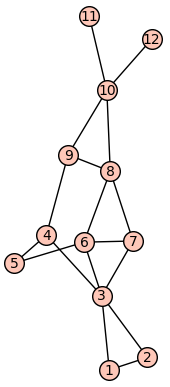

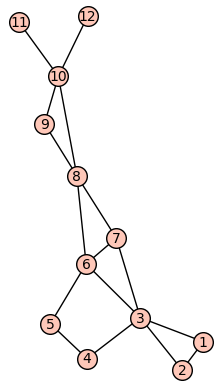

G False
F True


TypeError: Graph.minor() missing 1 required positional argument: 'H'

In [13]:
G = Graph({1:[2,3],2:[1,3],3:[4,6,7],4:[3,5,9],5:[4,6],6:[3,5,7],7:[3,6,8],8:[6,7,9,10],9:[4,8,10],10:[8,9,11,12],11:[10],12:[10]})
G.show()
F = Graph({1:[2,3],2:[1,3],3:[4,6,7],4:[3,5],5:[4,6],6:[3,5,7],7:[3,6,8],8:[6,7,9,10],9:[8,10],10:[8,9,11,12],11:[10],12:[10]})
F.show()
G.is_circular_planar()
F.is_circular_planar()
print("G", G.is_circular_planar())
print("F", F.is_circular_planar())
print("G", is_outerplanar(G))
print("F", is_outerplanar(F))


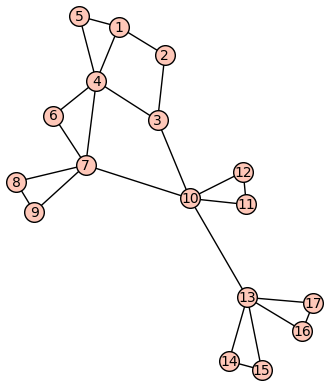

True

In [14]:
g = Graph({1:[2,4,5],2:[1,3],3:[2,10],4:[1,3,5,6,7],5:[1,4],6:[4,7],7:[4,6,8,9,10],8:[7,9],9:[7,8],
           10:[3,7,11,12,13],11:[10,12],12:[10,11],13:[10,14,15,16,17],14:[13,15],15:[13,14],16:[13,17],17:[13,16]})
g.show()
g.is_circular_planar()


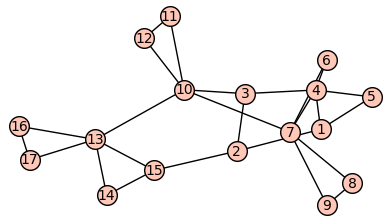

False

In [15]:
g = Graph({1:[2,4,5],2:[1,3,15],3:[2,10],4:[1,3,5,6,7],5:[1,4],6:[4,7],7:[4,6,8,9,10],8:[7,9],9:[7,8],
           10:[3,7,11,12,13],11:[10,12],12:[10,11],13:[10,14,15,16,17],14:[13,15],15:[13,14],16:[13,17],17:[13,16]})
g.show()
g.is_circular_planar()

In [1]:
from sage.all import Graph, graphs

def preveri_outerplanarnost(G, certificate=False, use_sage_method=True):
    """
    Preveri, ali je dani (neusmerjeni) graf outerplanaren.

    Parametri
    ---------
    G : sage.graphs.graph.Graph
        Vhodni graf.
    certificate : bool (privzeto False)
        Če je True:
          - ob outerplanarnosti vrne (True, None)
          - sicer vrne (False, ('K4' ali 'K23', model_minorja))
        kjer je model_minorja slovar iz G.minor(H).
    use_sage_method : bool (privzeto True)
        Če True, za osnovno odločitev uporabi G.is_circular_planar().
        Če False, odloča samo z minorji K4 in K2,3.

    Opombe
    ------
    - Outerplanar v Sage-u: is_circular_planar(). :contentReference[oaicite:2]{index=2}
    - Karakterizacija: outerplanar <=> brez minorjev K4 in K2,3. :contentReference[oaicite:3]{index=3}
    """

    # Osnovna higiena: outerplanarnost je običajno definirana za enostavne grafe.
    if G.is_directed():
        raise ValueError("Pričakovan je neusmerjen graf (Graph), ne digraf.")
    if G.has_loops():
        raise ValueError("Graf ima zanke; najprej jih odstrani (remove_loops) ali uporabi enostaven graf.")
    if G.has_multiple_edges():
        # Lahko bi tudi pretvorili v enostaven graf, a tukaj raje eksplicitno.
        raise ValueError("Graf ima večkratne povezave; pretvori ga v enostaven graf (npr. Graph(G, multiedges=False)).")

    if use_sage_method and not certificate:
        # Najhitrejša/standardna pot v Sage-u
        return G.is_circular_planar()

    # Minor test (hkrati uporaben za certifikat)
    K4 = graphs.CompleteGraph(4)
    K23 = graphs.CompleteBipartiteGraph(2, 3)

    mK4 = G.minor(K4)   # če minor obstaja, vrne model (dict); sicer None
    if mK4 is not None:
        return (False, ("K4", mK4)) if certificate else False

    mK23 = G.minor(K23)
    if mK23 is not None:
        return (False, ("K23", mK23)) if certificate else False

    return (True, None) if certificate else (G.is_circular_planar() if use_sage_method else True)

In [2]:
from sage.all import Graph, graphs

def preveri_outerplanarnosttt(G, certificate=False, use_sage_method=True):
    
    if use_sage_method and not certificate:
        # Najhitrejša/standardna pot v Sage-u
        return G.is_circular_planar()


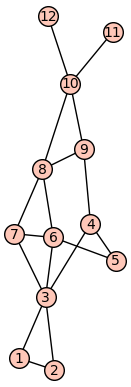

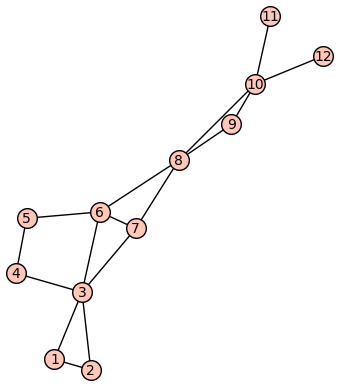

G False
F True
G False
F True


In [3]:
G = Graph({1:[2,3],2:[1,3],3:[4,6,7],4:[3,5,9],5:[4,6],6:[3,5,7],7:[3,6,8],8:[6,7,9,10],9:[4,8,10],10:[8,9,11,12],11:[10],12:[10]})
G.show()
F = Graph({1:[2,3],2:[1,3],3:[4,6,7],4:[3,5],5:[4,6],6:[3,5,7],7:[3,6,8],8:[6,7,9,10],9:[8,10],10:[8,9,11,12],11:[10],12:[10]})
F.show()
G.is_circular_planar()
F.is_circular_planar()
print("G", G.is_circular_planar())
print("F", F.is_circular_planar())
print("G", preveri_outerplanarnosttt(G))
print("F", preveri_outerplanarnosttt(F))


In [1]:
from sage.all import Graph, graphs

def preveri_outerplanarnost(G, certificate=False):


    # Minor test (hkrati uporaben za certifikat)
    K4 = graphs.CompleteGraph(4)
    K23 = graphs.CompleteBipartiteGraph(2, 3)

    mK4 = G.minor(K4)   # če minor obstaja, vrne model (dict); sicer None
    if mK4 is not None:
        return (False, ("K4", mK4)) if certificate else False

    mK23 = G.minor(K23)
    if mK23 is not None:
        return (False, ("K23", mK23)) if certificate else False

    return (True, None) if certificate else (G.is_circular_planar() if use_sage_method else True)

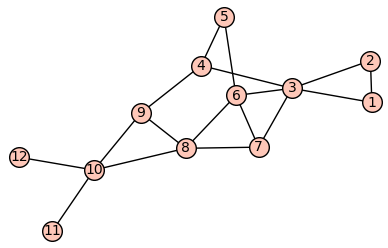

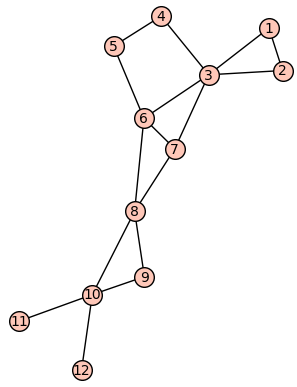

G False
F True


NameError: name 'is_OUTERPLANAR' is not defined

In [2]:
G = Graph({1:[2,3],2:[1,3],3:[4,6,7],4:[3,5,9],5:[4,6],6:[3,5,7],7:[3,6,8],8:[6,7,9,10],9:[4,8,10],10:[8,9,11,12],11:[10],12:[10]})
G.show()
F = Graph({1:[2,3],2:[1,3],3:[4,6,7],4:[3,5],5:[4,6],6:[3,5,7],7:[3,6,8],8:[6,7,9,10],9:[8,10],10:[8,9,11,12],11:[10],12:[10]})
F.show()
G.is_circular_planar()
F.is_circular_planar()
print("G", G.is_circular_planar())
print("F", F.is_circular_planar())
print("G", is_OUTERPLANAR(G))
print("F", is_OUTERPLANAR(F))


In [1]:
def outerplanar_graphs_up_to(n):
    OP = []
    for k in range(1, n+1):
        for G in graphs.planar_graphs(k):
            # hitro rezanje: outerplanarni grafi nimajo K4 in K2,3 minorjev
            if G.size() > 2*k - 3:
                continue
            if G.is_circular_planar():
                OP.append(G.copy())
    return OP


In [2]:
OP = outerplanar_graphs_up_to(8)
len(OP)

7687

In [23]:
OP8 = outerplanar_graphs_up_to(8)
len(OP8)
all(G.is_circular_planar() for G in OP8)

True

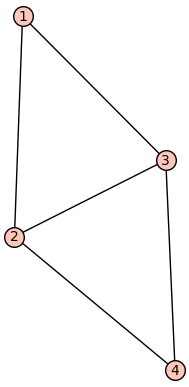

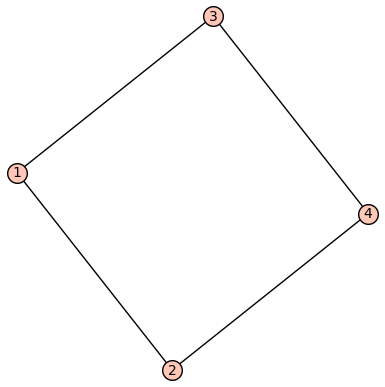

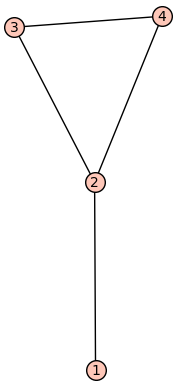

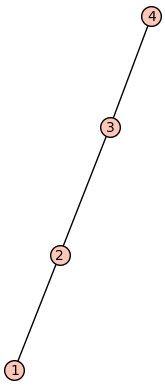

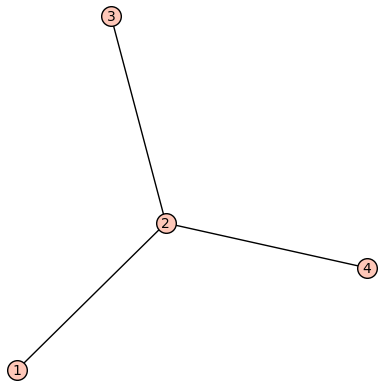

In [52]:
OP4 = [G for G in OP if G.num_verts() == 4] 
len(OP4)
for i in range(len(OP4)):
    OP4[i].show()

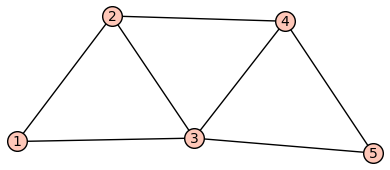

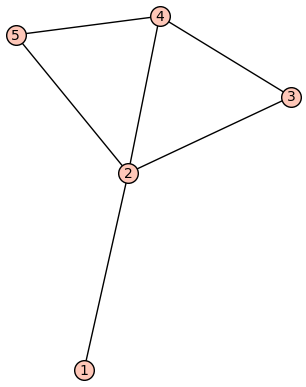

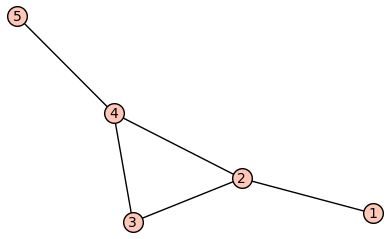

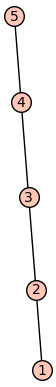

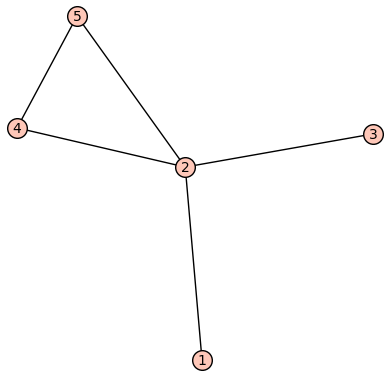

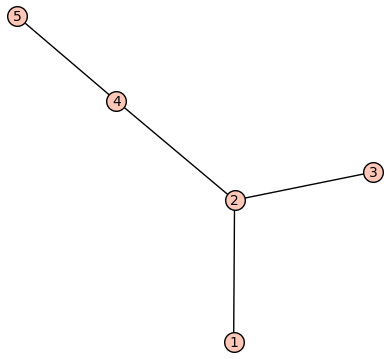

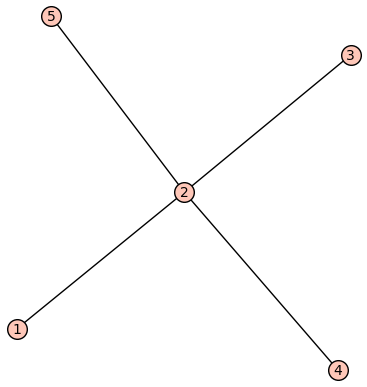

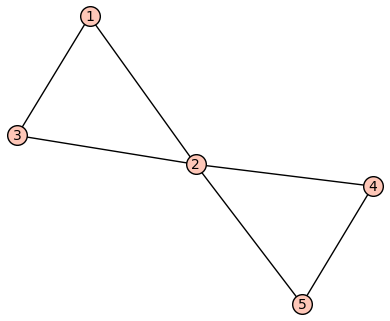

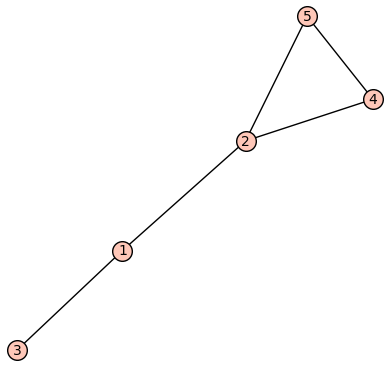

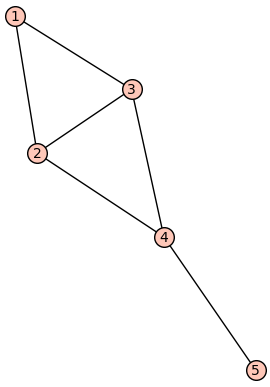

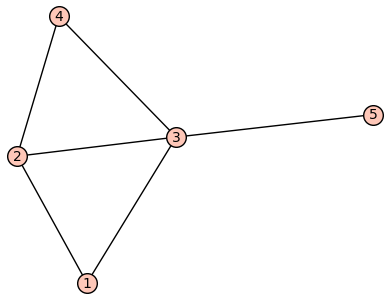

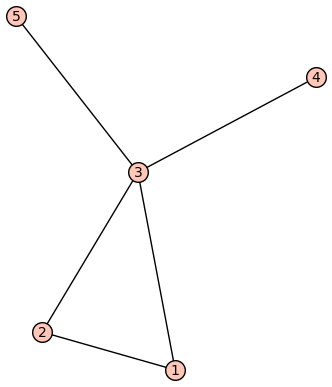

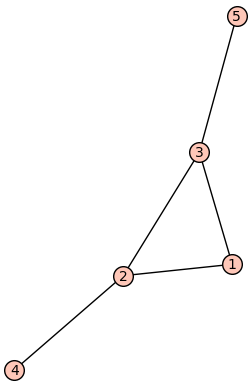

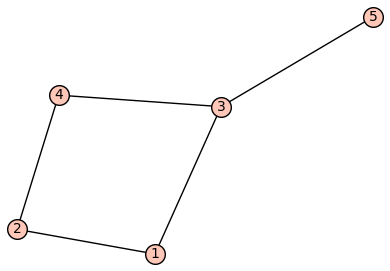

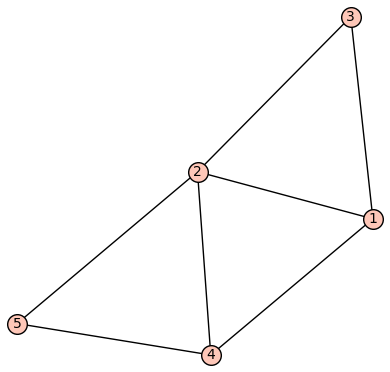

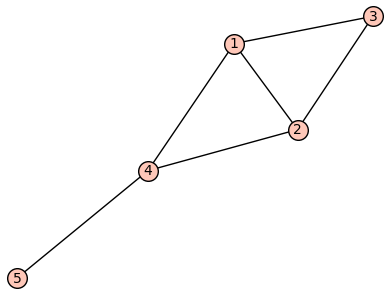

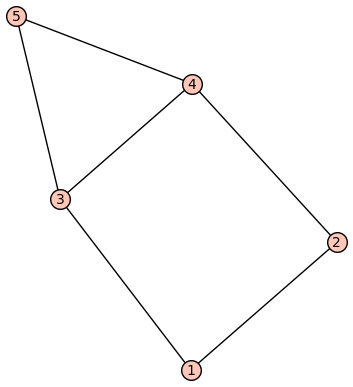

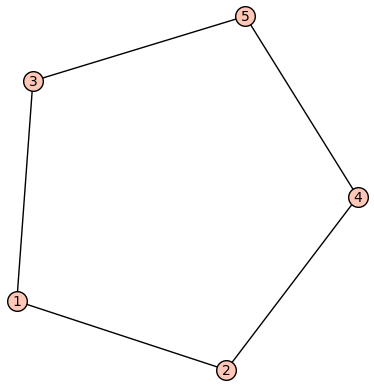

In [69]:
OP5 = [G for G in OP if G.num_verts() == 5]
len(OP5)
for i in range(len(OP5)):
    OP5[i].show()  

In [31]:
OP8 = [G for G in OP if G.num_verts() == 8]
len(OP8)

6823

In [55]:
OP7 = [G for G in OP if G.num_verts() == 7]
len(OP7)

738

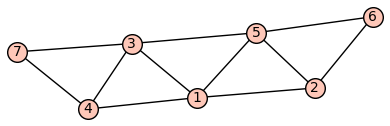

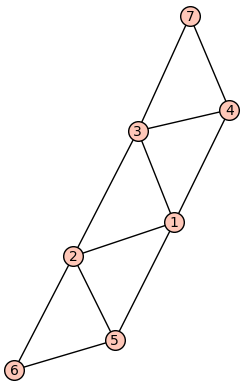

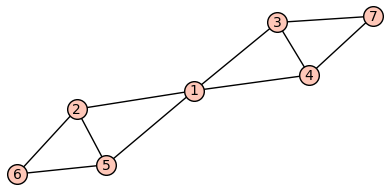

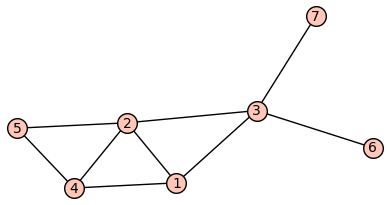

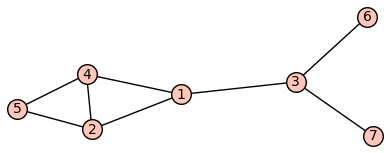

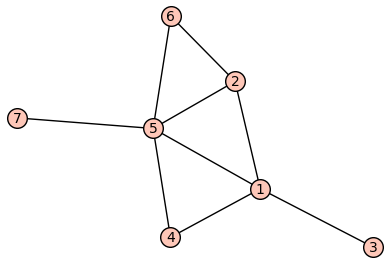

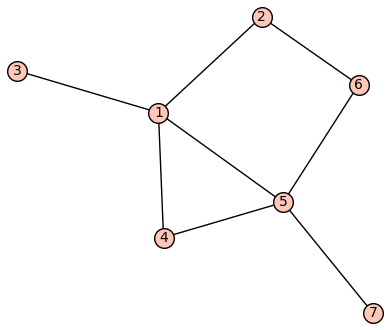

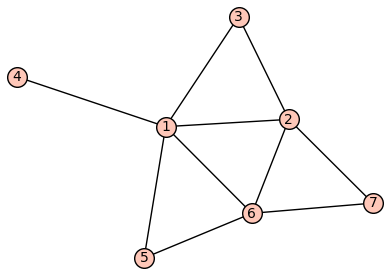

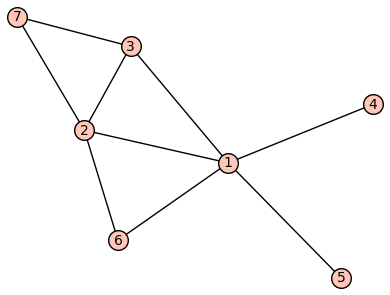

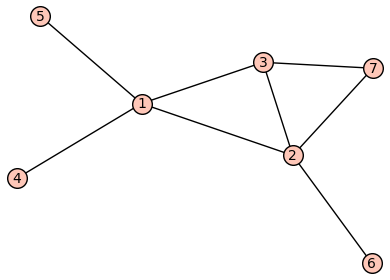

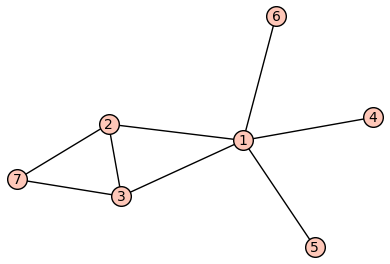

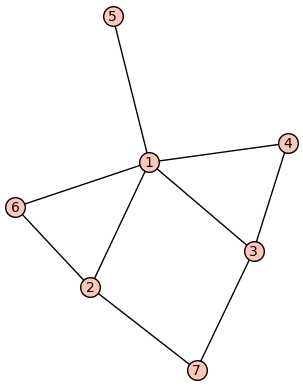

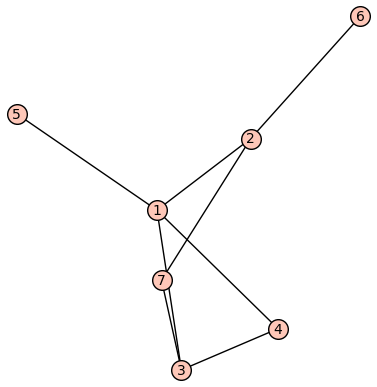

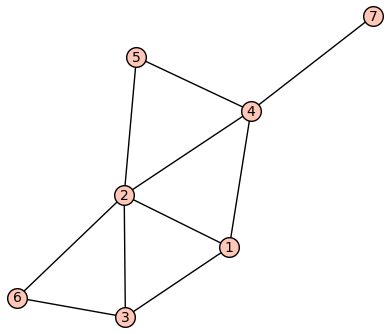

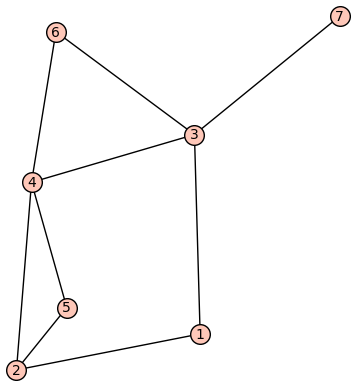

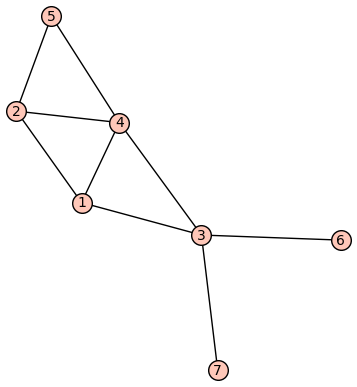

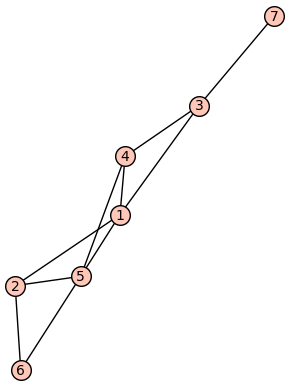

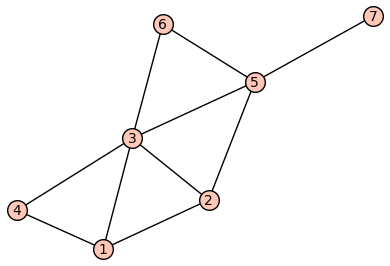

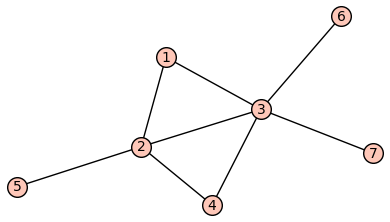

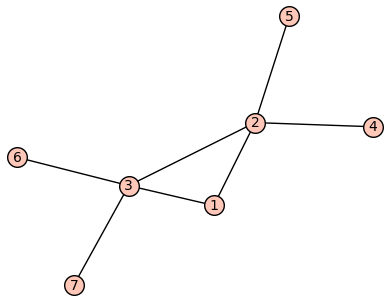

In [32]:
for i in range(20):
    OP7[i].show()

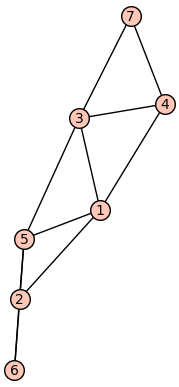

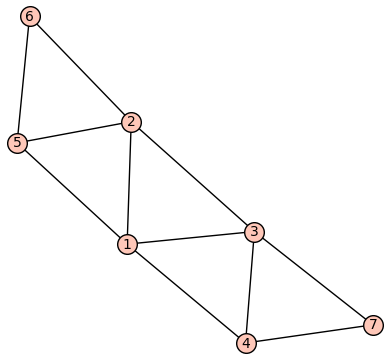

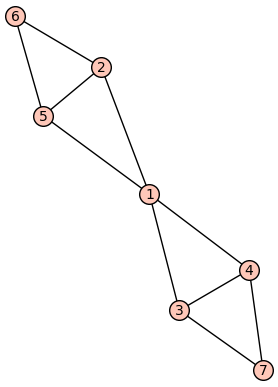

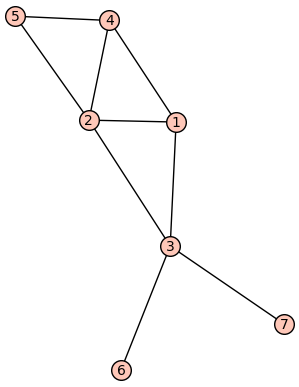

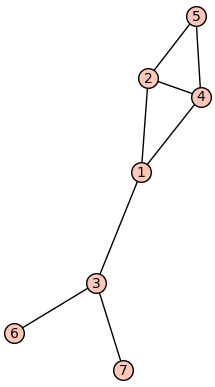

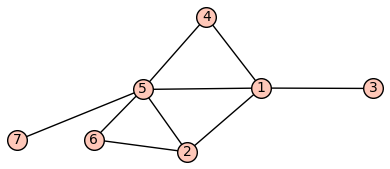

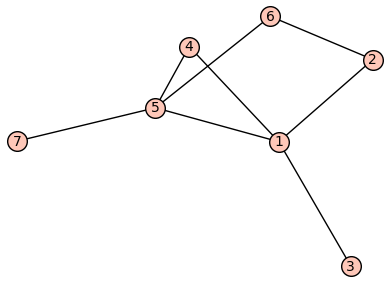

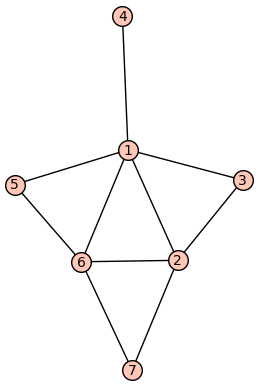

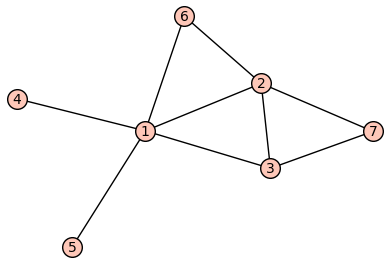

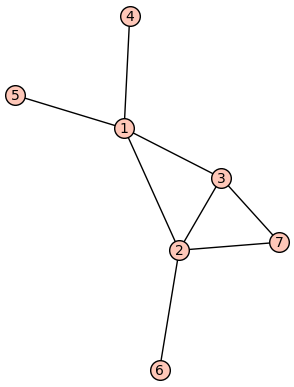

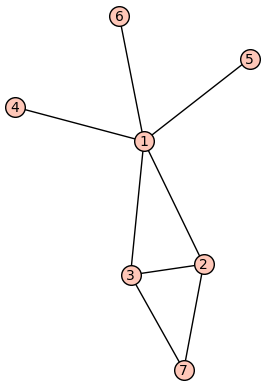

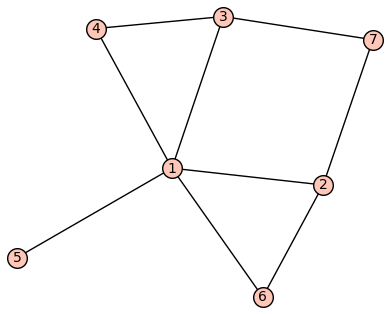

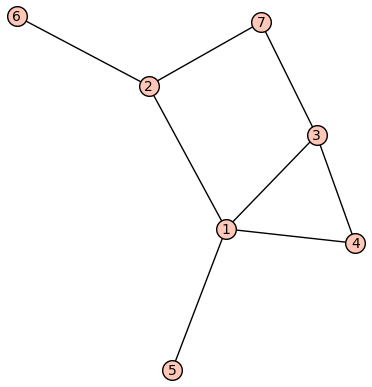

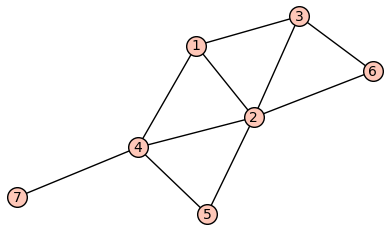

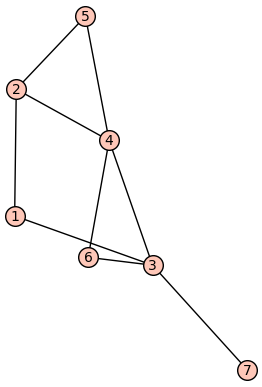

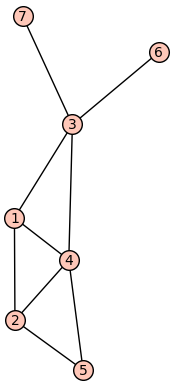

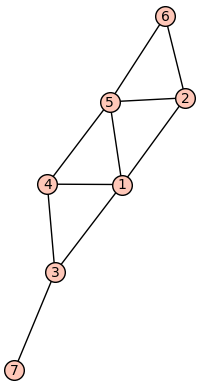

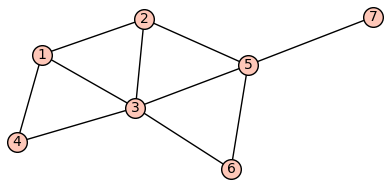

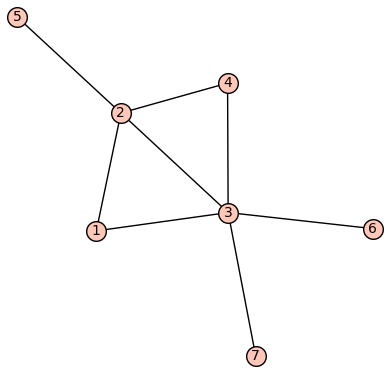

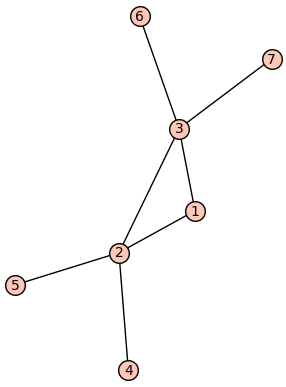

In [30]:
for i in range(20):
    OP8[i].show()

In [8]:
graphs.planar_graphs?

Signature:     
graphs.planar_graphs(
    self,
    order,
    minimum_degree=None,
    minimum_connectivity=None,
    exact_connectivity=False,
    minimum_edges=None,
    maximum_edges=None,
    maximum_face_size=None,
    only_bipartite=False,
    dual=False,
    immutable=False,
)
Docstring:     
   An iterator over connected planar graphs using the plantri
   generator.

   This uses the plantri generator (see [BM2007]) which is available
   through the optional package plantri.

   Note:

     The non-3-connected graphs will be returned several times, with
     all its possible embeddings.

   INPUT:

   * "order" -- positive integer smaller than or equal to 64; this
     specifies the number of vertices in the generated graphs

   * "minimum_degree" -- (default: "None") a value >= 1 and <= 5,
     or "None". This specifies the minimum degree of the generated
     graphs. If this is "None" and the order is 1, then this is set to
     0. If this is "None" and the minimum connectiv

In [6]:
list(graphs.planar_graphs(6))

[Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 

In [40]:
for G in OP5:
    print("alpha_od =", alpha_od(G))

alpha_od = 1
alpha_od = 1
alpha_od = 2
alpha_od = 2
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 1
alpha_od = 2
alpha_od = 2
alpha_od = 1
alpha_od = 3
alpha_od = 2
alpha_od = 2
alpha_od = 1
alpha_od = 2
alpha_od = 1
alpha_od = 1


In [41]:
for G in OP7[:50]:
    print("alpha_od =", alpha_od(G))

alpha_od = 2
alpha_od = 2
alpha_od = 2
alpha_od = 3
alpha_od = 3
alpha_od = 4
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 4
alpha_od = 3
alpha_od = 3
alpha_od = 2
alpha_od = 3
alpha_od = 3
alpha_od = 2
alpha_od = 2
alpha_od = 4
alpha_od = 5
alpha_od = 4
alpha_od = 4
alpha_od = 3
alpha_od = 2
alpha_od = 2
alpha_od = 4
alpha_od = 4
alpha_od = 3
alpha_od = 3
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 3
alpha_od = 4
alpha_od = 5
alpha_od = 4
alpha_od = 4
alpha_od = 3
alpha_od = 3
alpha_od = 4
alpha_od = 3
alpha_od = 4
alpha_od = 4
alpha_od = 3
alpha_od = 4
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3


In [42]:
for G in OP8[:100]:
    print("alpha_od =", alpha_od(G))

alpha_od = 2
alpha_od = 2
alpha_od = 2
alpha_od = 2
alpha_od = 2
alpha_od = 2
alpha_od = 4
alpha_od = 4
alpha_od = 3
alpha_od = 3
alpha_od = 4
alpha_od = 5
alpha_od = 5
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 5
alpha_od = 3
alpha_od = 4
alpha_od = 3
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 5
alpha_od = 3
alpha_od = 4
alpha_od = 4
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 4
alpha_od = 4
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 4
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 4
alpha_od = 3
alpha_od = 2
alpha_od = 2
alpha_od = 2
alpha_od = 4
alpha_od = 4
alpha_od = 3
alpha_od = 2
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 2
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 4
alpha_od = 3
alpha_od = 5
alpha_od = 3
alpha_od = 5
alpha_od = 3
alpha_od = 2

In [44]:
OP10 = outerplanar_graphs_up_to(15)

KeyboardInterrupt: 

In [3]:
def outerplanar_graphs_up_to2(n):
    OP = []
    for k in range(1, n+1):
        for G in graphs.planar_graphs(k):
            if G.size() > 2*k - 3:
                continue
            if G.is_circular_planar():
                if not any(G.is_isomorphic(H) for H in OP):
                    OP.append(G.copy())
    return OP




In [4]:
OP_2 = outerplanar_graphs_up_to2(8)
len(OP_2)

1016

In [5]:
OP_2 = outerplanar_graphs_up_to2(9)
len(OP_2)

4799

In [15]:
OP9 = [G for G in OP_2 if G.num_verts() == 9]
len(OP9)

3783

In [12]:
def outerplanar_graphs_n_fast(n):
    OP = []
    seen = set()   # shrani kanonične zapise

    for G in graphs.planar_graphs(n):
        if G.size() > 2*n - 3:
            continue
        if not G.is_circular_planar():
            continue

        canon = G.canonical_label().graph6_string()

        if canon not in seen:
            seen.add(canon)
            OP.append(G.copy())

    return OP


In [16]:
fast9 = outerplanar_graphs_n_fast(9)
len(fast9)

3783

In [21]:
fast10 = outerplanar_graphs_n_fast(10)
len(fast10)

KeyboardInterrupt: 

In [19]:
for n in range(1, 10):
    print(n, len(outerplanar_graphs_n_fast(n)))


1 0
2 1
3 2
4 5
5 13
6 46
7 172
8 777
9 3783


In [22]:
def outerplanar_graphs_n_ultra(n):
    OP = []
    seen = dict()  # invariant -> set kanoničnih zapisov

    for G in graphs.planar_graphs(n):
        if G.size() > 2*n - 3:
            continue
        if not G.is_circular_planar():
            continue

        invariant = (G.size(), tuple(sorted(G.degree())))

        if invariant not in seen:
            seen[invariant] = set()

        canon = G.canonical_label().graph6_string()

        if canon not in seen[invariant]:
            seen[invariant].add(canon)
            OP.append(G.copy())

    return OP


In [26]:
ultra10 = outerplanar_graphs_n_ultra(9)
len(ultra10)

3783

In [27]:
ultra10 = outerplanar_graphs_n_ultra(10)
len(ultra10)

20074

In [32]:
for G in ultra10[:50]:
    print("alpha_od =", alpha_od(G))

alpha_od = 5
alpha_od = 5
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 5
alpha_od = 4
alpha_od = 5
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 3
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 5
alpha_od = 5
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 3
alpha_od = 4
alpha_od = 4
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 3
alpha_od = 5
alpha_od = 5
alpha_od = 4
alpha_od = 4
alpha_od = 4
alpha_od = 5
alpha_od = 4
alpha_od = 4
alpha_od = 5
alpha_od = 5
alpha_od = 5
alpha_od = 6
alpha_od = 6
alpha_od = 5
alpha_od = 5


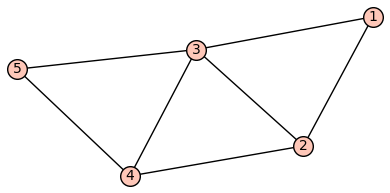

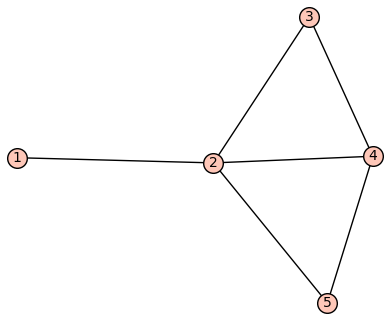

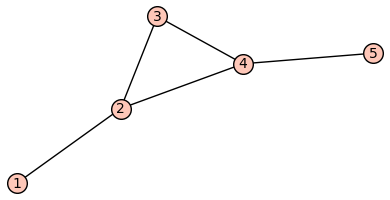

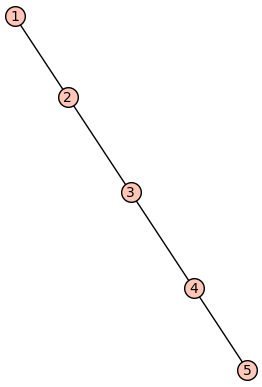

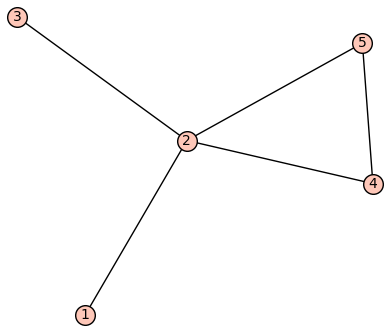

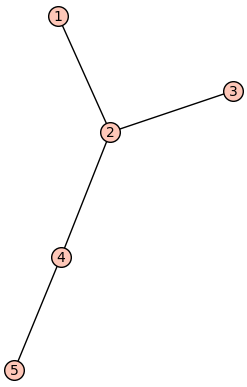

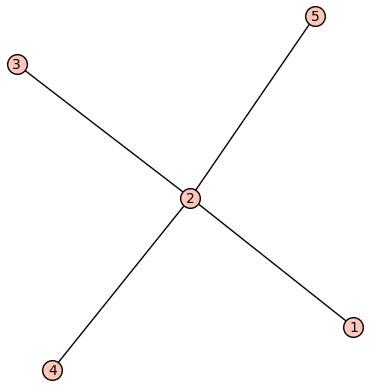

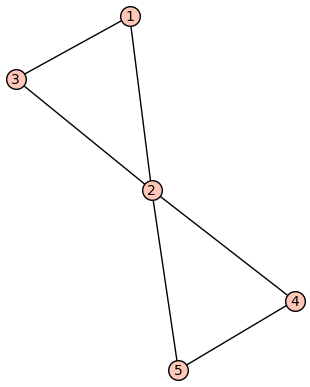

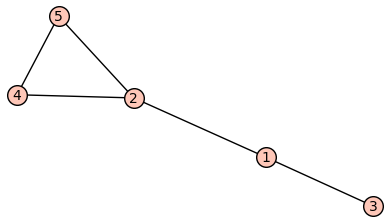

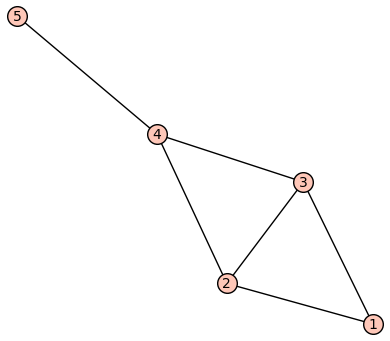

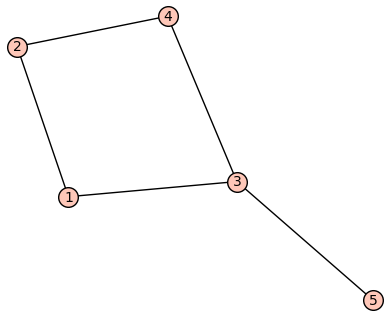

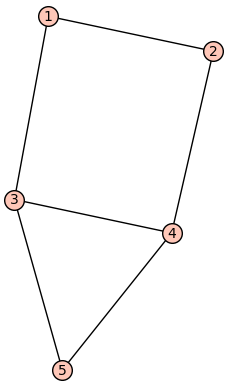

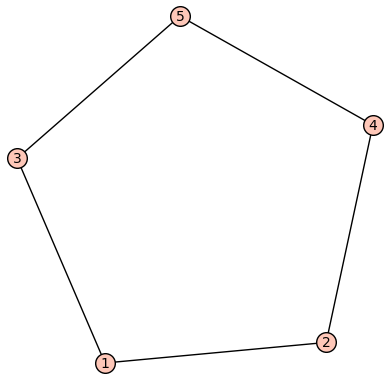

In [71]:
OP5 = [G for G in OP_2 if G.num_verts() == 5]
len(OP5)
for i in range(len(OP5)):
    OP5[i].show()

In [73]:
OP_do10 = outerplanar_graphs_up_to2(10)

KeyboardInterrupt: 

In [1]:
from sage.graphs.graph import Graph
import random

# 1) BLOK: NAKLJUČEN MAKSIMALEN OUTERPLANARNI GRAF (TRIANGULACIJA POLIGONA)

def _random_maximal_outerplanar(m, seed=None):
    """
    Ustvari naključen maksimalen outerplanarni graf na m vozliščih (m >= 3).

    Kaj pomeni "maksimalen outerplanaren"?
    - Graf je outerplanaren (ima risbo brez presekanj, kjer so vsa vozlišča na zunanjem licu).
    - Je maksimalen: nobenega dodatnega roba ne moreš dodati, da bi ostal outerplanaren.
      Ekvivalentno: predstavlja triangulacijo m-kotnika (poligona).

    Konstrukcija ("dodaj uho"):
    - Začnemo s trikotnikom.
    - Dokler ne dobimo m vozlišč:
        * izberemo naključni rob na trenutnem zunanjem ciklu (a,b)
        * med a in b na zunanjem ciklu "vstavimo" nov vrh v
        * dodamo roba (a,v) in (v,b)
      S tem vedno ohranimo outerplanarnost in maksimalnost.

    Vrne:
    - G: Graph na vozliščih 0..m-1
    - outer: seznam vrhov v vrstnem redu po zunanjem ciklu
    """
    if m < 3:
        raise ValueError("m mora biti >= 3 (najmanj trikotnik).")

    rng = random.Random(seed)

    # Ustvarimo prazen graf z vozlišči 0..m-1
    G = Graph()
    G.add_vertices(range(m))

    # Začetni trikotnik: 0-1-2-0
    G.add_edges([(0, 1), (1, 2), (2, 0)])

    # Zunanji cikel (outer face) v tem trenutku: 0,1,2
    outer = [0, 1, 2]

    # Dodajamo nova vozlišča 3..m-1
    for v in range(3, m):
        k = len(outer)

        # Naključno izberemo "zunanji rob" (a,b), kjer b sledi a v seznamu outer
        i = rng.randrange(k)
        a = outer[i]
        b = outer[(i + 1) % k]

        # Vstavimo v med a in b v zunanjem vrstnem redu
        outer.insert(i + 1, v)

        # Dodamo roba, ki tvorita novo "uho" (trikotnik a-v-b)
        # Rob (a,b) je že del zunanjega cikla in že obstaja.
        G.add_edge(a, v)
        G.add_edge(v, b)

    return G, outer


# ======================================================================
# 2) REDČENJE BLOKA: ODSTRANI DEL DIAGONAL, A OHRANI ZUNANJI CIKEL
# ======================================================================
def _sparsify_keep_outer_cycle(G, outer_order, remove_prob=0.2, seed=None):
    """
    Naključno odstrani del diagonal v outerplanarnem bloku,
    vendar ohrani robove zunanjega cikla.

    Zakaj:
    - maksimalen outerplanarni graf (triangulacija) ima veliko robov (~2m-3).
    - če želiš "bolj redek" outerplanarni graf, odstraniš nekaj diagonal.
    - odstranjevanje robov ohranja outerplanarnost.

    Parametri:
    - G: outerplanaren graf, običajno maksimalen
    - outer_order: vrstni red vrhov zunanjega cikla
    - remove_prob: verjetnost odstranitve posamezne diagonale (rob, ki NI na ciklu)
    - seed: seed za ponovljivost

    Vrne:
    - G (isti objekt, spremenjen in-place)
    """
    if remove_prob <= 0:
        return G

    rng = random.Random(seed)

    # Zgradimo množico robov, ki so na zunanjem ciklu (teh ne smemo odstraniti)
    outer_edges = set()
    k = len(outer_order)
    for i in range(k):
        u = outer_order[i]
        v = outer_order[(i + 1) % k]
        outer_edges.add(tuple(sorted((u, v))))

    # Kandidati za odstranitev = robovi, ki niso na zunanjem ciklu (diagonale)
    diagonals = []
    for (u, v) in G.edges(labels=False):
        e = tuple(sorted((u, v)))
        if e not in outer_edges:
            diagonals.append((u, v))

    # Vsako diagonalo odstranimo z verjetnostjo remove_prob
    for (u, v) in diagonals:
        if rng.random() < remove_prob:
            G.delete_edge(u, v)

    return G


# ======================================================================
# 3) GLAVNA FUNKCIJA: OUTERPLANARNI GRAF NA n VOZLIŠČIH Z VEČ BLOKI
# ======================================================================
def random_outerplanar_graph(
    n,
    *,
    min_block_size=3,
    max_block_size=None,
    expected_blocks=None,
    remove_prob=0.25,
    seed=None
):
    """
    Generira naključen outerplanarni graf na n vozliščih.

    Glavna ideja:
    1) Najprej naredimo en 2-povezan outerplanarni blok
       (cikel + nekrižajoče diagonale, v praksi triangulacija + optional redčenje).
    2) Nato dodajamo nove bloke in jih lepimo v "drevo blokov":
       vsak nov blok deli NATANKO ENO vozlišče z že zgrajenim grafom.
       To skupno vozlišče je rezno (cut-vertex).
    3) Takšno lepljenje ohranja outerplanarnost.

    Parametri:
    - n: število vozlišč (n >= 1)
    - min_block_size: minimalna velikost 2-povezanega bloka (>=3)
    - max_block_size: maksimalna velikost bloka (None -> n)
    - expected_blocks: heuristika za približno število blokov
    - remove_prob: verjetnost odstranitve diagonal znotraj vsakega bloka
    - seed: seed za ponovljivost

    Vrne:
    - Graph (Sage) na vozliščih 0..n-1
    """
    if n <= 0:
        raise ValueError("n mora biti >= 1.")

    rng = random.Random(seed)

    # --- majhni primeri: vedno outerplanarno ---
    if n == 1:
        G = Graph()
        G.add_vertex(0)
        return G

    if n == 2:
        return Graph([(0, 1)])

    if n < min_block_size:
        # pot (path) na n vozliščih je outerplanarna
        G = Graph()
        G.add_vertices(range(n))
        G.add_edges([(i, i + 1) for i in range(n - 1)])
        return G

    # Nastavimo maksimalno velikost bloka
    if max_block_size is None:
        max_block_size = n
    max_block_size = max(max_block_size, min_block_size)

    # ------------------------------------------------------------
    # A) IZDELAMO PRVI BLOK
    # ------------------------------------------------------------
    # Heuristika: če uporabnik poda expected_blocks, približno ciljamo na povprečno velikost blokov
    if expected_blocks is not None and expected_blocks >= 1:
        avg = max(min_block_size, min(max_block_size, (n + expected_blocks - 1) // expected_blocks))
        s1 = rng.randint(min_block_size, min(max_block_size, max(min_block_size, 2 * avg)))
        s1 = max(min_block_size, min(s1, n))
    else:
        s1 = rng.randint(min_block_size, min(max_block_size, n))

    # Naredimo maksimalen outerplanarni blok in ga po želji razredčimo
    B, outer = _random_maximal_outerplanar(s1, seed=rng.randrange(10**18))
    _sparsify_keep_outer_cycle(B, outer, remove_prob=remove_prob, seed=rng.randrange(10**18))

    # Začnemo končni graf s prvim blokom; ta že uporablja oznake 0..s1-1
    G_final = B
    next_new_vertex = s1  # naslednja prosta oznaka vozlišča

    # ------------------------------------------------------------
    # B) DODAJAMO BLOKE, DOKLER NE DOSEŽEMO n VOZLIŠČ
    # ------------------------------------------------------------
    # Vsak nov blok velikosti t doda (t-1) novih vozlišč, ker 1 vozlišče deli z G_final.
    while next_new_vertex < n:
        remaining = n - next_new_vertex

        # Največji možni blok: doda (t-1) novih vozlišč <= remaining  =>  t <= remaining + 1
        t_max = min(max_block_size, remaining + 1)
        t_min = min_block_size

        # Če nimamo več prostora za blok velikosti >=3, preostanek dodamo kot verigo (drevesno)
        if t_max < t_min:
            attach = rng.choice(G_final.vertices())
            for _ in range(remaining):
                v = next_new_vertex
                G_final.add_vertex(v)
                G_final.add_edge(attach, v)
                attach = v
                next_new_vertex += 1
            break

        # Izberemo velikost bloka (lahko rahlo biasiramo, če je expected_blocks podan)
        if expected_blocks is not None:
            blocks_left = max(1, expected_blocks - 1)  # zelo groba ocena
            avg = max(min_block_size, min(t_max, (remaining + blocks_left) // blocks_left))
            t = rng.randint(min_block_size, min(t_max, max(min_block_size, 2 * avg)))
        else:
            t = rng.randint(t_min, t_max)

        # Ustvarimo nov blok na lokalnih vozliščih 0..t-1
        B, outer = _random_maximal_outerplanar(t, seed=rng.randrange(10**18))
        _sparsify_keep_outer_cycle(B, outer, remove_prob=remove_prob, seed=rng.randrange(10**18))

        # Izberemo vozlišče v že zgrajenem grafu, na katerega bomo blok prilepili
        glue_global = rng.choice(G_final.vertices())

        # V bloku izberemo lokalni "glue" vrh (enostavno: 0)
        glue_local = 0

        # Preslikava oznak:
        # - glue_local postane glue_global (to je skupno vozlišče)
        # - ostali vrhovi dobijo nove oznake next_new_vertex, next_new_vertex+1, ...
        mapping = {}
        for v in B.vertices():
            if v == glue_local:
                mapping[v] = glue_global
            else:
                mapping[v] = next_new_vertex
                next_new_vertex += 1

        B = B.relabel(mapping, inplace=False)

        # Združimo (union) robove novega bloka s trenutnim grafom
        G_final.add_vertices([v for v in B.vertices() if v not in G_final])
        G_final.add_edges(B.edges(labels=False))

    # Končno: poskrbimo, da graf vsebuje točno vozlišča 0..n-1
    G_final.add_vertices(range(n))
    return G_final

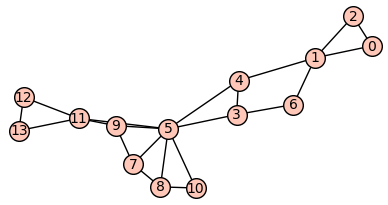

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!


In [6]:
G = random_outerplanar_graph(14)
G.show()
t = G.is_circular_planar()
status = "JE outerplanaren" if t else "NI outerplanaren"
print(f"Graf G {status}!")
alpha = alpha_od(G)
if alpha >= G.order()/7:
    print("alpha_od(G) JE večja ali enaka n/7!")
else:
    print("alpha_od(G) NI večja ali enaka n/7!")    

In [7]:
def test_outerplanar_alpha_range(n_min, n_max, *, seed=None):
    """
    Za vsak n v intervalu [n_min, n_max] naredi:
      - generira random_outerplanar_graph(n)
      - prikaže graf
      - preveri outerplanarnost
      - izračuna alpha_od
      - preveri pogoj alpha_od >= n/7
    """
    import random
    rng = random.Random(seed)

    for n in range(n_min, n_max + 1):

        print("\n" + "=" * 14)
        print(f"Test za n = {n}")
        print("=" * 14)

        # generiranje grafa
        G = random_outerplanar_graph(n, seed=rng.randrange(10**18))

        # risanje
        G.plot().show()

        # outerplanarnost
        t = G.is_circular_planar()
        status = "JE outerplanaren" if t else "NI outerplanaren"
        print(f"Graf G {status}!")

        # alpha_od
        alpha = alpha_od(G)
        threshold = G.order() / 7
        # preverjanje pogoja
        if alpha >= threshold:
            print("alpha_od(G) JE večja ali enaka n/7!")
        else:
            print("alpha_od(G) NI večja ali enaka n/7!")


Test za n = 10


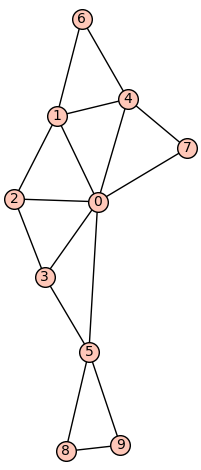

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 11


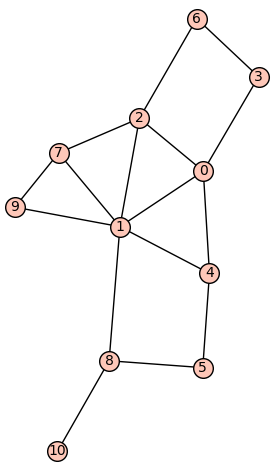

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 12


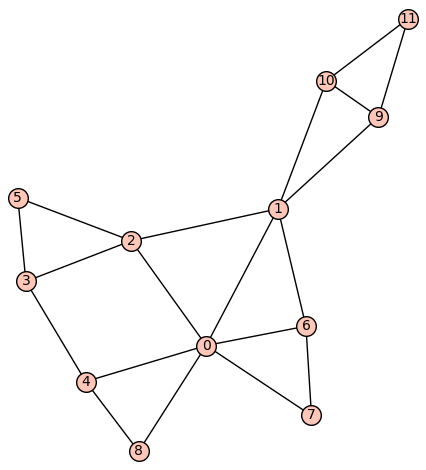

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 13


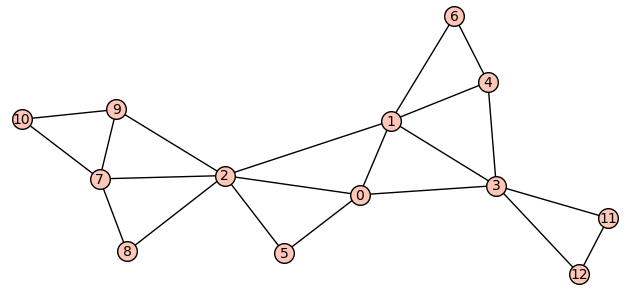

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 14


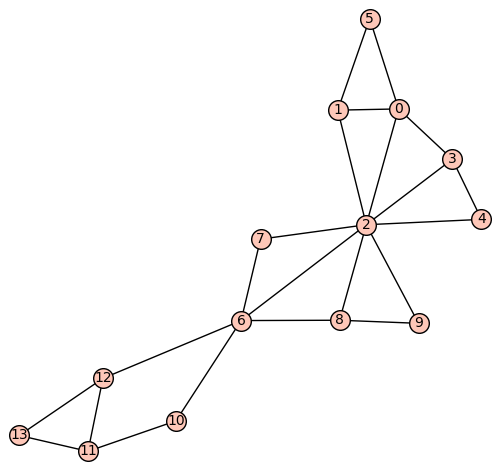

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 15


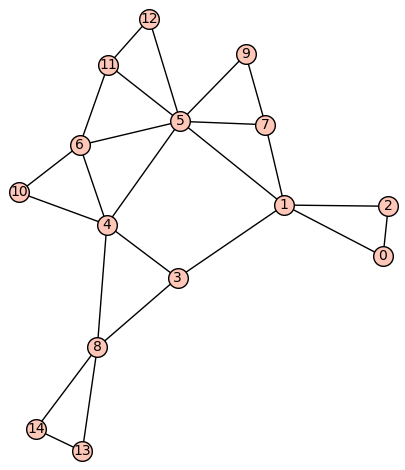

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 16


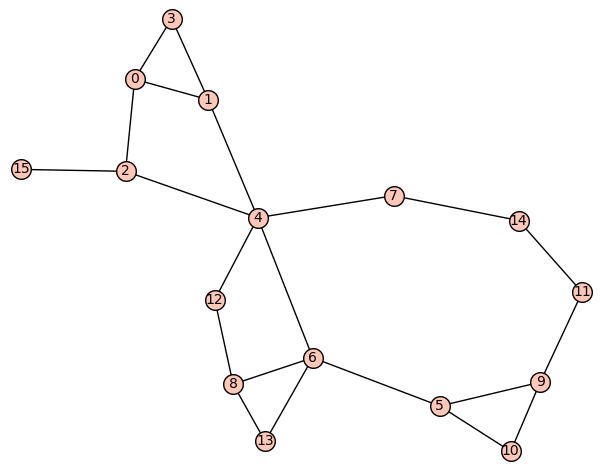

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 17


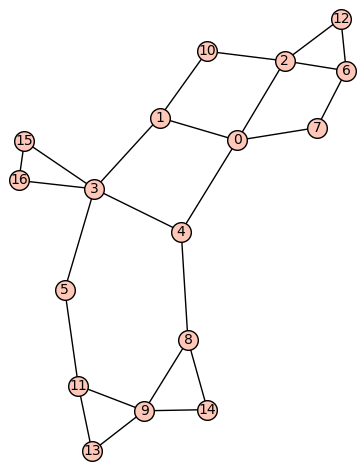

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 18


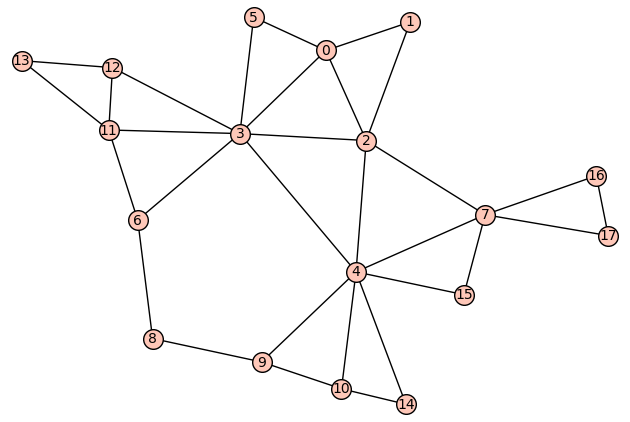

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 19


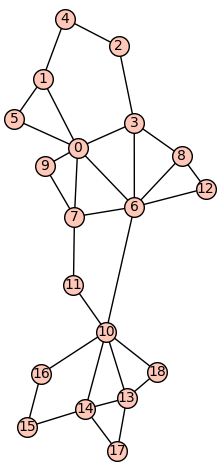

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 20


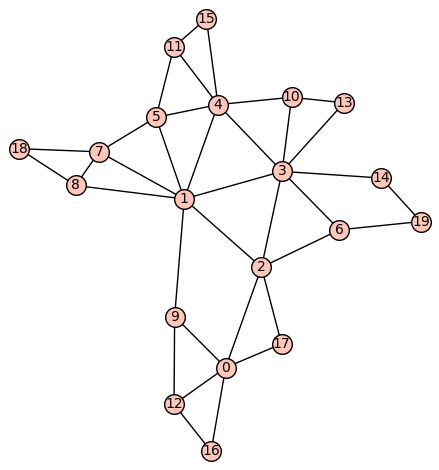

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!


In [8]:
test_outerplanar_alpha_range(10, 20)